# Syed Muhammad Zain Assignment 3 329876 Computer Vision Image Stitching 

## Reading Images and Converting to GrayScale

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#libraries importing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Buildingimage1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/image stitching project/building1.JPG")
Buildingimage2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/image stitching project/building2.JPG")
print(Buildingimage1.shape)
print(Buildingimage2.shape)
Buildingimage1=cv2.cvtColor(Buildingimage1, cv2.COLOR_BGR2RGB)
Buildingimage2=cv2.cvtColor(Buildingimage2, cv2.COLOR_BGR2RGB)               

(480, 640, 3)
(480, 640, 3)


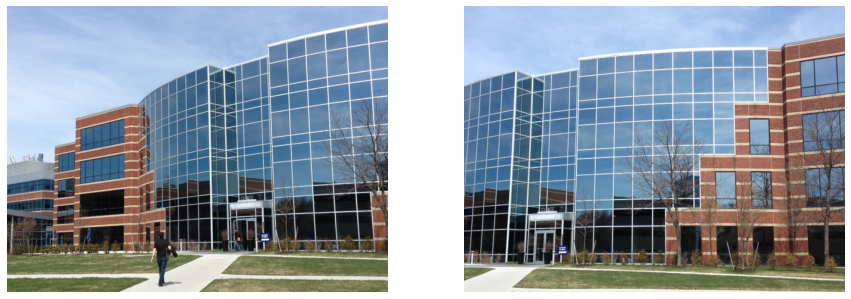

In [4]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(Buildingimage1)#it is BGR we need RGB
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(Buildingimage2)

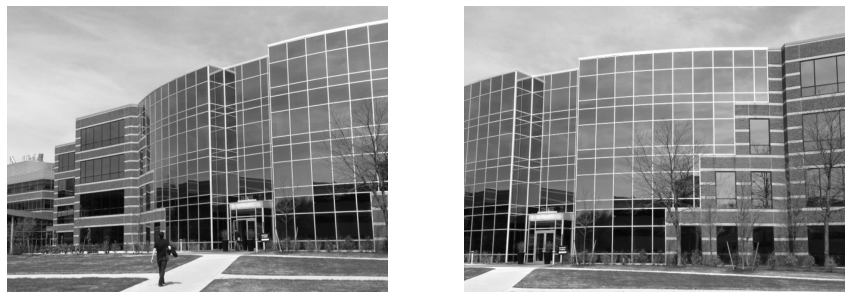

In [5]:
#grayscale image
Buildingimage1g = cv2.cvtColor(Buildingimage1, cv2.COLOR_RGB2GRAY)#converting to grayscale
Buildingimage2g = cv2.cvtColor(Buildingimage2, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.axis('off')#turning no axis off
plt.imshow(Buildingimage1g,cmap='gray')
plt.subplot(1,2,2)
plt.axis('off')#turing no axis off
plt.imshow(Buildingimage2g,cmap='gray')

# Detecting keypoints and find their descriptors using orb since sift and surf are not avaliable similar to sift and surf

In [6]:
#creating orb object and storing keypoints and descriptors
Storeorb=cv2.ORB_create(2500)
KEYP1, DESCRIP1= Storeorb.detectAndCompute(Buildingimage1, None)
KEYP2, DESCRIP2 = Storeorb.detectAndCompute(Buildingimage2, None)

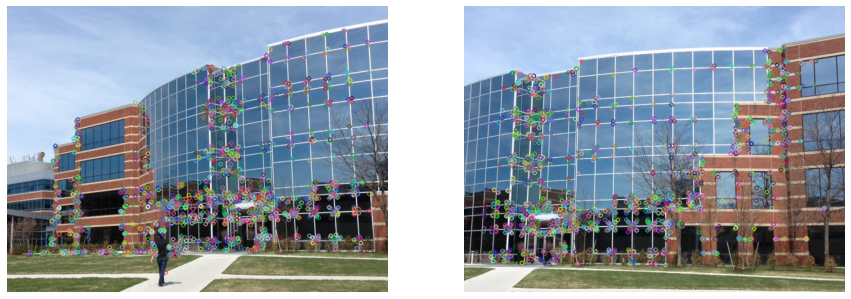

In [7]:
#displaying keypoints
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(cv2.drawKeypoints(Buildingimage1,KEYP1, None))# draw keypoints function is used for drawing the keypoints
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(cv2.drawKeypoints(Buildingimage2,KEYP2, None))

## Matching points using keypoints and descriptions that were found earlier

In [8]:
# norm hamming is the distance that  is used for ORB 
Formatching = cv2.BFMatcher_create(cv2.NORM_HAMMING)
Matchescreated = Formatching.knnMatch(DESCRIP1, DESCRIP2,k=2)

In [9]:
#finding best matches using threshold as 0.55
bestmatches = []
for inone,intwo in Matchescreated:
    if inone.distance < 0.55*intwo.distance:
        bestmatches.append(inone)

In [10]:
fordrawing1= dict(matchColor=(255,74,100),singlePointColor=None, flags=2)                                          

In [11]:
imageMatch=cv2.drawMatches(Buildingimage1,KEYP1,Buildingimage2,KEYP2,bestmatches,None,**fordrawing1)

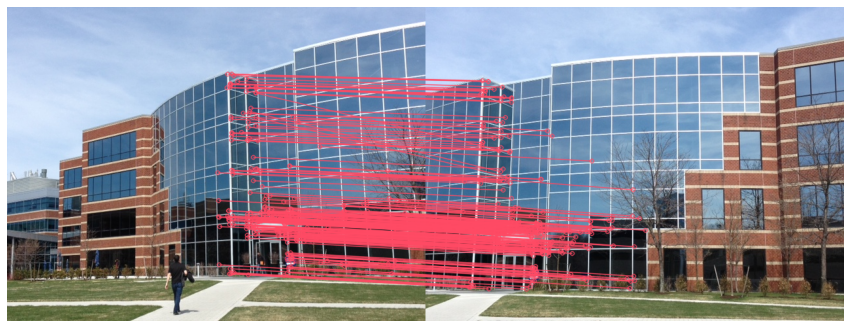

In [12]:
plt.figure(figsize=(15,6))
plt.axis('off')
plt.imshow(imageMatch)


In [13]:
# this is for application of the warp perspective after the homography matrix has been computed
def Transformationofimage(I1, I2, HomographyM):
    R1, C1 = I1.shape[:2]
    R2, C2 = I2.shape[:2]
    Referenceimagepoints = np.float32([[0,0], [0, R1],[C1, R1], [C1, 0]]).reshape(-1, 1, 2)
    Secondimage = np.float32([[0,0], [0,R2], [C2,R2], [C2,0]]).reshape(-1,1,2)
    points2= cv2.perspectiveTransform(Secondimage, HomographyM)
    Finalpoints = np.concatenate((Referenceimagepoints,points2), axis=0)
    [xminimum, yminimum] = np.int32(Finalpoints.min(axis=0).ravel() - 0.5)
    [xmaximum, ymaximum] = np.int32(Finalpoints.max(axis=0).ravel() + 0.5)
    TD= [-xminimum,-yminimum]
    HT = np.array([[1, 0, TD[0]], [0, 1, TD[1]], [0, 0, 1]])
    OUTPUT = cv2.warpPerspective(I2, HT.dot(HomographyM), (xmaximum-xminimum, ymaximum-yminimum))
    OUTPUT[TD[1]:R1+TD[1], TD[0]:C1+TD[0]] = I1
    return OUTPUT

## Using RANSAC And finding homography matrix


In [14]:
MMC = 10 # minimum match count
if len(bestmatches) > MMC:
    sourcepoints=np.float32([ KEYP1[inone.queryIdx].pt for inone in bestmatches ]).reshape(-1,1,2)
    destinationpoints=np.float32([ KEYP2[inone.trainIdx].pt for inone in bestmatches ]).reshape(-1,1,2)
    Matrix, maskofmat = cv2.findHomography(sourcepoints, destinationpoints, cv2.RANSAC, 5.0)# RANSAC APPLIED
    stictchedF=Transformationofimage(Buildingimage2,Buildingimage1,Matrix)
else:
    print("ERROR")

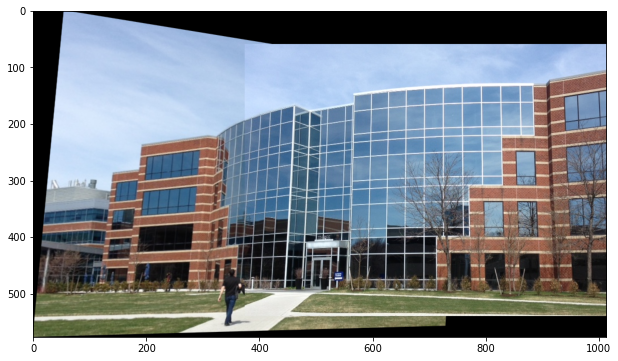

In [15]:
plt.figure(figsize=(15,6))
plt.imshow(stictchedF)

## Applying same information to all the five images

(577, 1014, 3)
(480, 640, 3)


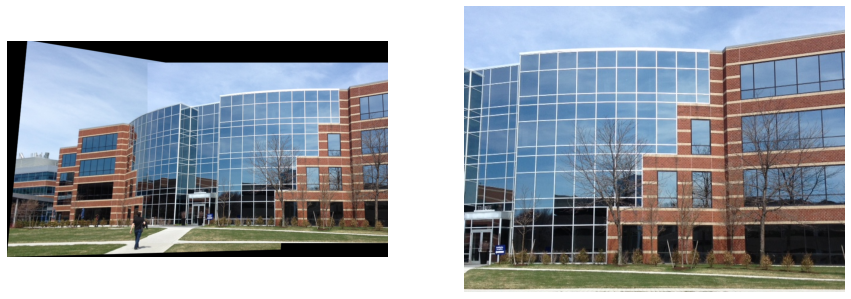

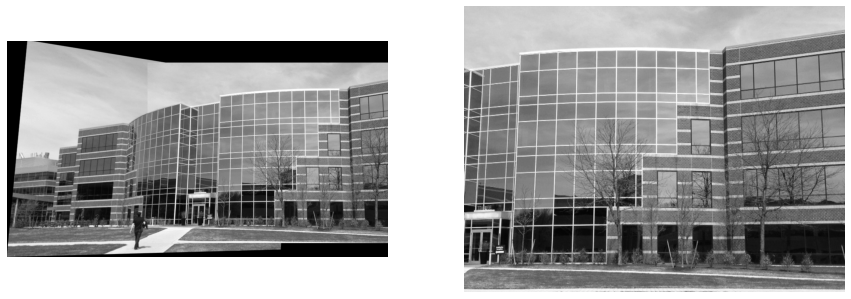

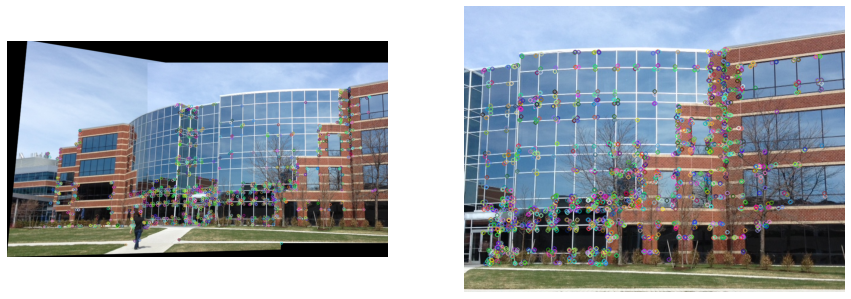

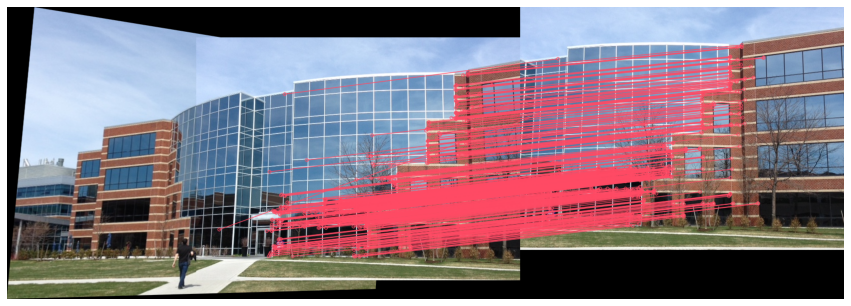

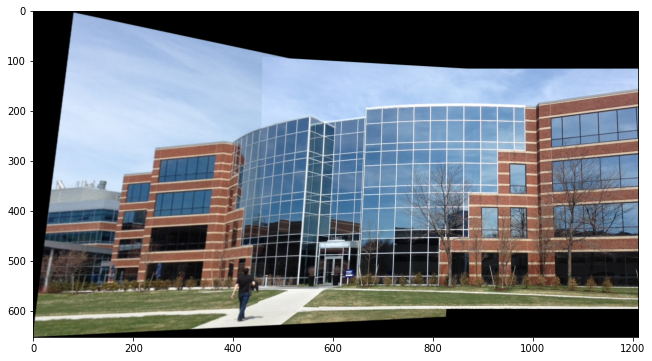

In [16]:
Buildingimage1 = cv2.cvtColor(stictchedF, cv2.COLOR_BGR2RGB)
Buildingimage2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/image stitching project/building3.JPG")
print(Buildingimage1.shape)
print(Buildingimage2.shape)
Buildingimage1=cv2.cvtColor(Buildingimage1, cv2.COLOR_BGR2RGB)
Buildingimage2=cv2.cvtColor(Buildingimage2, cv2.COLOR_BGR2RGB)   
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(Buildingimage1)#it is BGR we need RGB
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(Buildingimage2)
#grayscale image
Buildingimage1g = cv2.cvtColor(Buildingimage1, cv2.COLOR_RGB2GRAY)#converting to grayscale
Buildingimage2g = cv2.cvtColor(Buildingimage2, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.axis('off')#turning no axis off
plt.imshow(Buildingimage1g,cmap='gray')
plt.subplot(1,2,2)
plt.axis('off')#turing no axis off
plt.imshow(Buildingimage2g,cmap='gray')
Storeorb=cv2.ORB_create(2500)
KEYP1, DESCRIP1= Storeorb.detectAndCompute(Buildingimage1, None)
KEYP2, DESCRIP2 = Storeorb.detectAndCompute(Buildingimage2, None)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(cv2.drawKeypoints(Buildingimage1,KEYP1, None))
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(cv2.drawKeypoints(Buildingimage2,KEYP2, None))
# norm hamming is used for ORB 
Formatching = cv2.BFMatcher_create(cv2.NORM_HAMMING)
Matchescreated = Formatching.knnMatch(DESCRIP1, DESCRIP2,k=2)
bestmatches = []
for inone,intwo in Matchescreated:
    if inone.distance < 0.55*intwo.distance:
        bestmatches.append(inone)
fordrawing1= dict(matchColor=(255,74,100),singlePointColor=None, flags=2)             
imageMatch=cv2.drawMatches(Buildingimage1,KEYP1,Buildingimage2,KEYP2,bestmatches,None,**fordrawing1)
plt.figure(figsize=(15,6))
plt.axis('off')
plt.imshow(imageMatch)
MMC = 10 # minimum match count
if len(bestmatches) > MMC:
    sourcepoints=np.float32([ KEYP1[inone.queryIdx].pt for inone in bestmatches ]).reshape(-1,1,2)
    destinationpoints=np.float32([ KEYP2[inone.trainIdx].pt for inone in bestmatches ]).reshape(-1,1,2)
    Matrix, maskofmat = cv2.findHomography(sourcepoints, destinationpoints, cv2.RANSAC, 5.0)
    stictchedF=Transformationofimage(Buildingimage2,Buildingimage1,Matrix)
else:
    print("ERROR")
plt.figure(figsize=(15,6))
plt.imshow(stictchedF)

(653, 1212, 3)
(480, 640, 3)


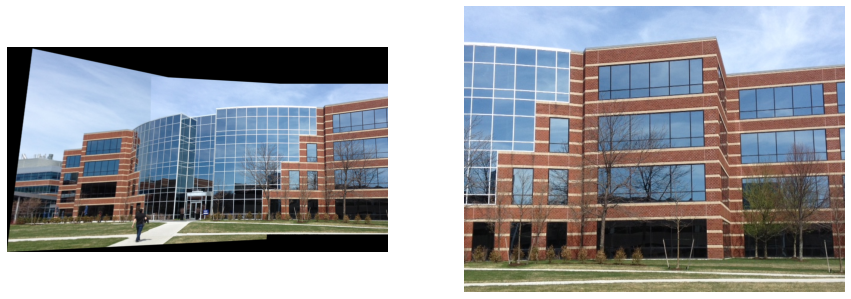

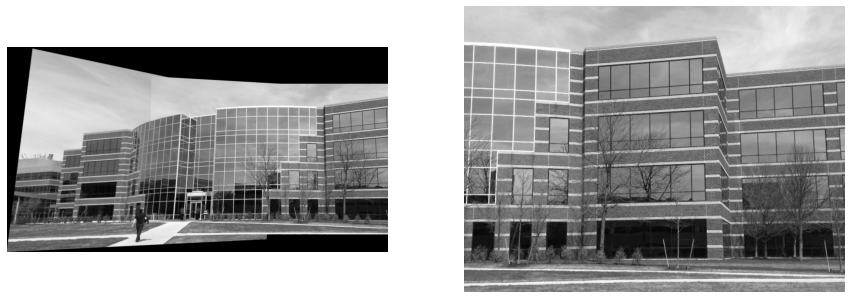

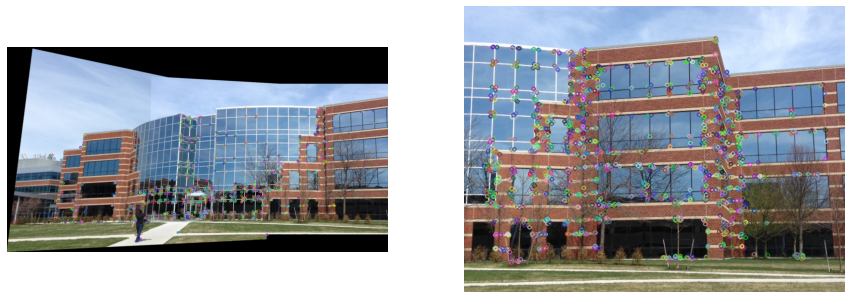

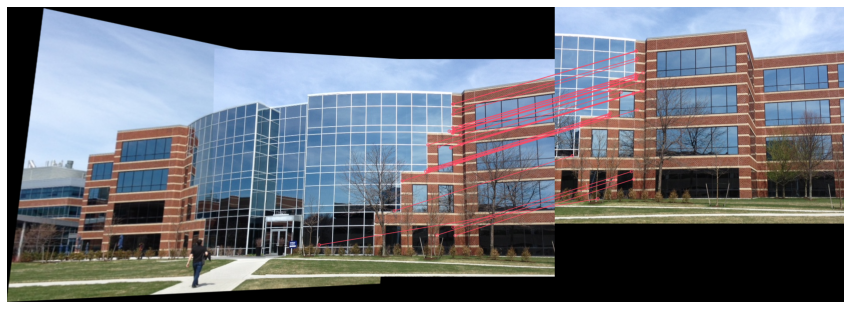

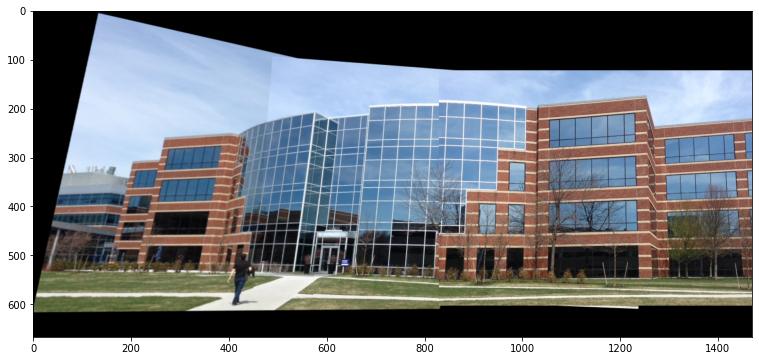

In [17]:
Buildingimage1 = cv2.cvtColor(stictchedF, cv2.COLOR_BGR2RGB)
Buildingimage2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/image stitching project/building4.JPG")
print(Buildingimage1.shape)
print(Buildingimage2.shape)
Buildingimage1=cv2.cvtColor(Buildingimage1, cv2.COLOR_BGR2RGB)
Buildingimage2=cv2.cvtColor(Buildingimage2, cv2.COLOR_BGR2RGB)   
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(Buildingimage1)#it is BGR we need RGB
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(Buildingimage2)
#grayscale image
Buildingimage1g = cv2.cvtColor(Buildingimage1, cv2.COLOR_RGB2GRAY)#converting to grayscale
Buildingimage2g = cv2.cvtColor(Buildingimage2, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.axis('off')#turning no axis off
plt.imshow(Buildingimage1g,cmap='gray')
plt.subplot(1,2,2)
plt.axis('off')#turing no axis off
plt.imshow(Buildingimage2g,cmap='gray')
Storeorb=cv2.ORB_create(2500)
KEYP1, DESCRIP1= Storeorb.detectAndCompute(Buildingimage1, None)
KEYP2, DESCRIP2 = Storeorb.detectAndCompute(Buildingimage2, None)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(cv2.drawKeypoints(Buildingimage1,KEYP1, None))
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(cv2.drawKeypoints(Buildingimage2,KEYP2, None))
# norm hamming is used for ORB 
Formatching = cv2.BFMatcher_create(cv2.NORM_HAMMING)
Matchescreated = Formatching.knnMatch(DESCRIP1, DESCRIP2,k=2)
bestmatches = []
for inone,intwo in Matchescreated:
    if inone.distance < 0.55*intwo.distance:
        bestmatches.append(inone)
fordrawing1= dict(matchColor=(255,74,100),singlePointColor=None, flags=2)             
imageMatch=cv2.drawMatches(Buildingimage1,KEYP1,Buildingimage2,KEYP2,bestmatches,None,**fordrawing1)
plt.figure(figsize=(15,6))
plt.axis('off')
plt.imshow(imageMatch)
MMC = 10 # minimum match count
if len(bestmatches) > MMC:
    sourcepoints=np.float32([ KEYP1[inone.queryIdx].pt for inone in bestmatches ]).reshape(-1,1,2)
    destinationpoints=np.float32([ KEYP2[inone.trainIdx].pt for inone in bestmatches ]).reshape(-1,1,2)
    Matrix, maskofmat = cv2.findHomography(sourcepoints, destinationpoints, cv2.RANSAC, 5.0)
    stictchedF=Transformationofimage(Buildingimage2,Buildingimage1,Matrix)
else:
    print("ERROR")
plt.figure(figsize=(15,6))
plt.imshow(stictchedF)

(667, 1470, 3)
(480, 640, 3)


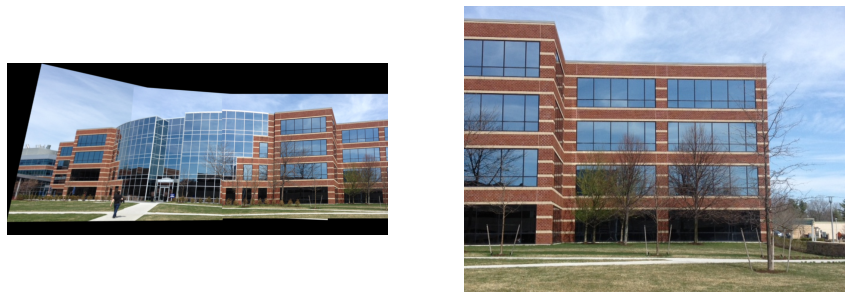

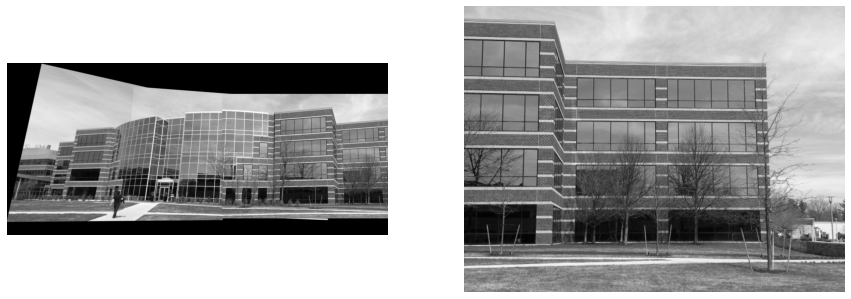

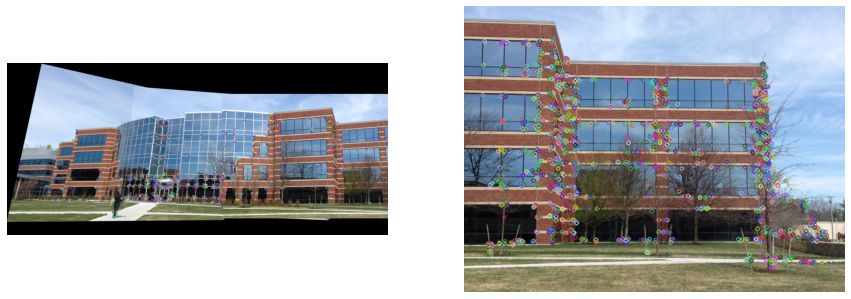

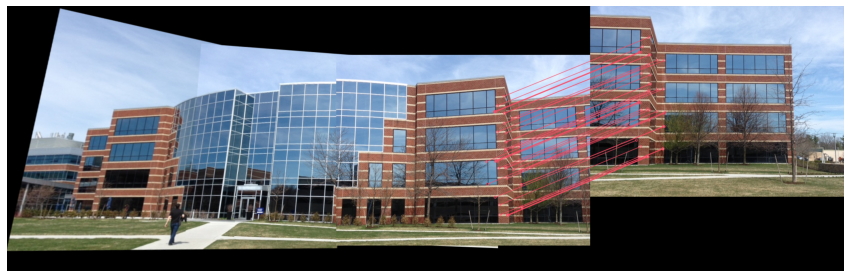

In [18]:
Buildingimage1 = cv2.cvtColor(stictchedF, cv2.COLOR_BGR2RGB)
Buildingimage2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/image stitching project/building5.JPG")
print(Buildingimage1.shape)
print(Buildingimage2.shape)
Buildingimage1=cv2.cvtColor(Buildingimage1, cv2.COLOR_BGR2RGB)
Buildingimage2=cv2.cvtColor(Buildingimage2, cv2.COLOR_BGR2RGB)   
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(Buildingimage1)#it is BGR we need RGB
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(Buildingimage2)
#grayscale image
Buildingimage1g = cv2.cvtColor(Buildingimage1, cv2.COLOR_RGB2GRAY)#converting to grayscale
Buildingimage2g = cv2.cvtColor(Buildingimage2, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.axis('off')#turning no axis off
plt.imshow(Buildingimage1g,cmap='gray')
plt.subplot(1,2,2)
plt.axis('off')#turing no axis off
plt.imshow(Buildingimage2g,cmap='gray')
Storeorb=cv2.ORB_create(2500)
KEYP1, DESCRIP1= Storeorb.detectAndCompute(Buildingimage1, None)
KEYP2, DESCRIP2 = Storeorb.detectAndCompute(Buildingimage2, None)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(cv2.drawKeypoints(Buildingimage1,KEYP1, None))
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(cv2.drawKeypoints(Buildingimage2,KEYP2, None))
# norm hamming is used for ORB 
Formatching = cv2.BFMatcher_create(cv2.NORM_HAMMING)
Matchescreated = Formatching.knnMatch(DESCRIP1, DESCRIP2,k=2)
bestmatches = []
for inone,intwo in Matchescreated:
    if inone.distance < 0.55*intwo.distance:
        bestmatches.append(inone)
fordrawing1= dict(matchColor=(255,74,100),singlePointColor=None, flags=2)             
imageMatch=cv2.drawMatches(Buildingimage1,KEYP1,Buildingimage2,KEYP2,bestmatches,None,**fordrawing1)
plt.figure(figsize=(15,6))
plt.axis('off')
plt.imshow(imageMatch)
MMC = 10 # minimum match count
if len(bestmatches) > MMC:
    sourcepoints=np.float32([ KEYP1[inone.queryIdx].pt for inone in bestmatches ]).reshape(-1,1,2)
    destinationpoints=np.float32([ KEYP2[inone.trainIdx].pt for inone in bestmatches ]).reshape(-1,1,2)
    Matrix, maskofmat = cv2.findHomography(sourcepoints, destinationpoints, cv2.RANSAC, 5.0)
    stictchedF=Transformationofimage(Buildingimage2,Buildingimage1,Matrix)
else:
    print("ERROR")

## Final panaroma  all five images

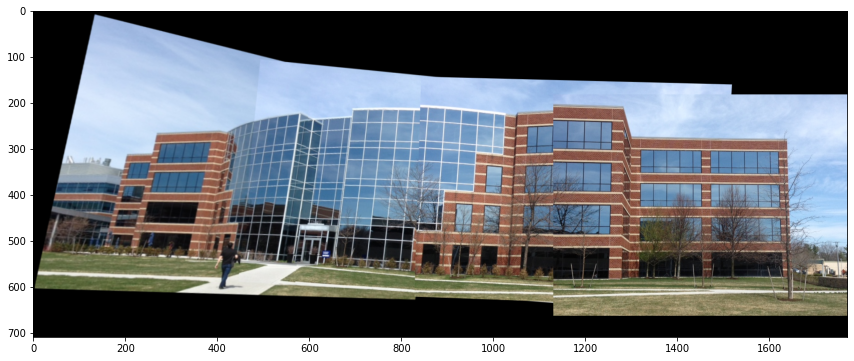

In [19]:
plt.figure(figsize=(15,6))
plt.imshow(stictchedF)

## Comparison with the built in function in python

In [20]:
I1=cv2.imread("/content/drive/MyDrive/Colab Notebooks/image stitching project/building1.JPG")
I2=cv2.imread("/content/drive/MyDrive/Colab Notebooks/image stitching project/building2.JPG")
I3=cv2.imread("/content/drive/MyDrive/Colab Notebooks/image stitching project/building3.JPG")
I4=cv2.imread("/content/drive/MyDrive/Colab Notebooks/image stitching project/building4.JPG")
I5=cv2.imread("/content/drive/MyDrive/Colab Notebooks/image stitching project/building5.JPG")

In [21]:
Images=[]

In [22]:
Images.append(I1)
Images.append(I2)
Images.append(I3)
Images.append(I4)
Images.append(I5)

In [23]:
buildinStitch=cv2.Stitcher.create()# built in  stitcher function
(Stat,OUTPUTStitch)=buildinStitch.stitch(Images)
FinalO=cv2.cvtColor(OUTPUTStitch, cv2.COLOR_BGR2RGB)

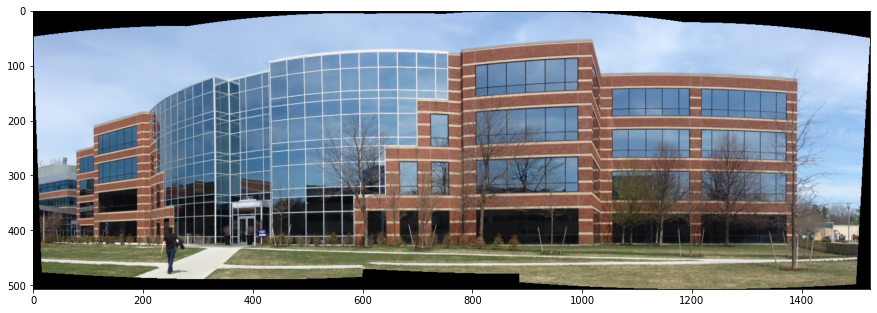

In [24]:
plt.figure(figsize=(15,6))
plt.imshow(FinalO)